<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/3-ascending-to-3d-world/3d_drawing_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D drawing with Python

In the 2D plane, we worked with three interchangeable mental models of a vector:
coordinate pairs, arrows of fixed length and direction, and points positioned relative to the origin.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/2d-plane.png?raw=1' width='800'/>

We can interpret a 3D vector in similar ways. Instead of viewing a rectangular portion of the plane, we start with a finite box of 3D space. Such a
3D box, has a finite height, width, and depth. In 3D, we keep the notions of x and y directions, and we add a z direction with which to measure the depth.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/3d-plane.png?raw=1' width='800'/>

Arrows and points work as mental models for vectors in 3D just like in 2D, and we can measure them similarly with coordinates.



## Setup

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/vectors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/colors.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw2d.py
wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/3-ascending-to-3d-world/draw3d.py

In [2]:
from draw3d import *

%load_ext autoreload
%autoreload 2

## 3D drawing

A new function, draw3d, knows how to interpret and render these objects so as to make these look three-dimensional. By default, draw3d() shows the axes and the origin as well as a small box of 3D space (figure 3.9), even if no objects
are specified for drawing.

The x-, y-, and z-axes that are drawn are perpendicular in the space, despite being skewed by our perspective. For visual clarity, Matplotlib shows the units outside the box, but the origin and the axes themselves are displayed within the box. The origin is the coordinate (0, 0, 0), and the axes emanate from it in the positive and negative x, y, and z directions.

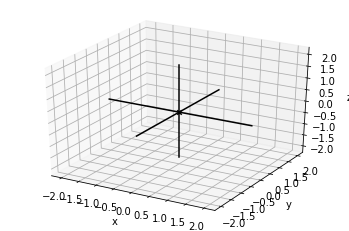

In [3]:
draw3d()

The Points3D class stores a collection of vectors we want to think of as points and, therefore, draw as dots in 3D space. For instance, we could plot the vectors `(2, 2, 2)` and `(1, –2, –2)`.

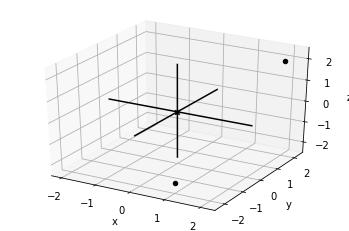

In [4]:
draw3d(Points3D((2, 2, 2), (1, -2, -2)))

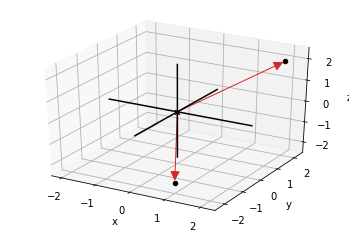

In [5]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2))
    )

To visualize these vectors instead as arrows, we can represent the vectors as Arrow3D objects. We can also connect the tips of arrows with a Segment3D object as follows.

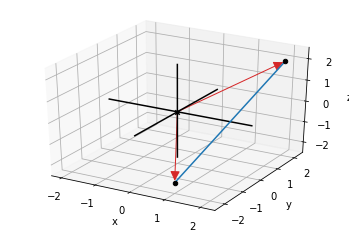

In [6]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1,-2, -2))
    )

It’s a bit hard to see which direction the arrows are pointing. 

To make it clearer, we can draw dashed boxes around the arrows to make them look more threedimensional. Because we’ll draw these boxes so frequently, I created a Box3D class to represent a box with one corner at the origin and the opposite one at a given point.

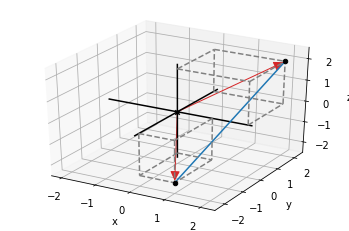

In [7]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1,-2, -2)),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2)
    )

## Exercises

**Ex-3.1**: Draw the 3D arrow and point representing the coordinates
(–1, –2, 2) as well as the dashed box that makes the arrow look 3D. Do this drawing by hand for practice, but from now on, we’ll use Python to draw for us.

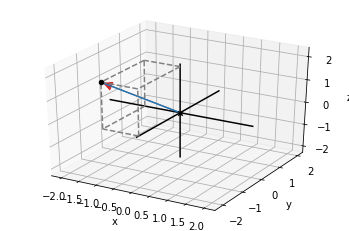

In [9]:
draw3d(
    Points3D((-1, -2, 2)),
    Arrow3D((-1, -2, 2)),
    Segment3D((0, 0, 0), (-1, -2, 2)),
    Box3D(-1, -2, 2)
    )

**Ex-3.2**: There are exactly eight 3D vectors whose coordinates
are all either +1 or –1. For instance, (1, –1, 1) is one of these. Plot all of
these eight vectors as points. Then figure out how to connect them with line segments using Segment3D objects to form the outline of a cube.

**Hint** - You’ll need 12 segments in total.

**Solution** - Because there are only 8 vertices and 12 edges, it’s not too tedious to list them all, but I decided to enumerate them with a list comprehension. For the vertices, I let x, y, and z range over the list of two possible values [1,–1] and collected the eight results. For the edges, I grouped them into three sets of four that point in each coordinate direction. For instance, there are four edges that go from x = –1 to x = 1, while their y- and z-coordinates are the same at both endpoints:

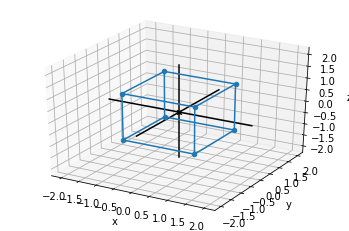

In [10]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] +\
        [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +\
        [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices, color=blue),
    *[Segment3D(*edge) for edge in edges]
)